In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



# Question 1

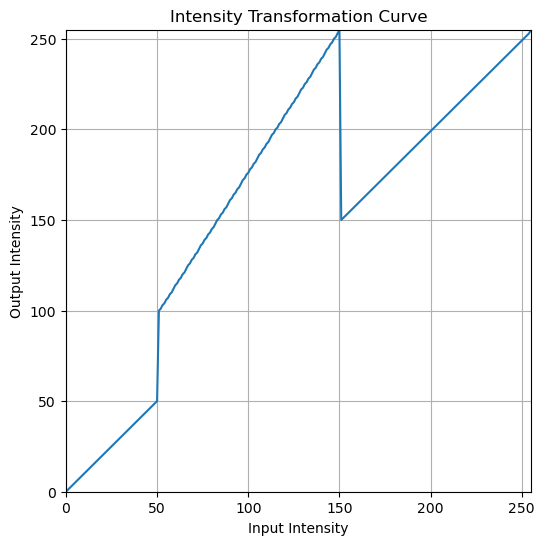

In [16]:
# Load the image in grayscale
image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None, "Image not found - check the path"

# Define the piecewise linear transformation
# Segment 1: 0-50 → 0-50 (linear)
t1 = np.linspace(0, 50, num=51).astype('uint8')

# Segment 2: 51-150 → 100-255 (linear)
t2 = np.linspace(100, 255, num=100).astype('uint8')

# Segment 3: 151-255 → 150-255 (linear)
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Combine all segments to create the full transformation LUT
transformation = np.concatenate((t1, t2, t3), axis=0).astype('uint8')


# Plot the transformation curve
plt.figure(figsize=(6, 6))
plt.plot(transformation)
plt.title('Intensity Transformation Curve')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

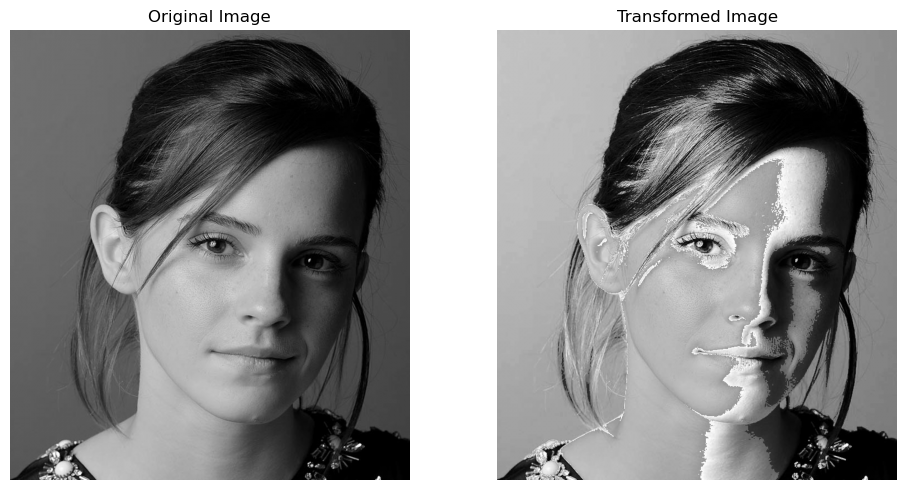

In [17]:


# Apply the transformation to the image
transformed_image = transformation[image]

# Display original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Question 2

In [18]:


# Load brain image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None, "Brain image not found"

def apply_gaussian_transform(image, mu, sigma, plot_title=""):
    """Apply Gaussian transformation and plot results"""
    # Create Gaussian pulse transformation
    x = np.linspace(0, 255, 256)
    t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))
    t = np.clip(t, 0, 255).astype('uint8')
    
    # Plot transformation curve
    plt.figure(figsize=(5, 5))
    plt.plot(t)
    plt.title(plot_title)
    plt.xlabel("Input Intensity")
    plt.ylabel("Output Intensity")
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid(True)
    plt.show()
    
    # Apply transformation
    transformed = t[image]
    
    # Display result
    plt.figure(figsize=(5, 5))
    plt.imshow(transformed, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    
    return transformed



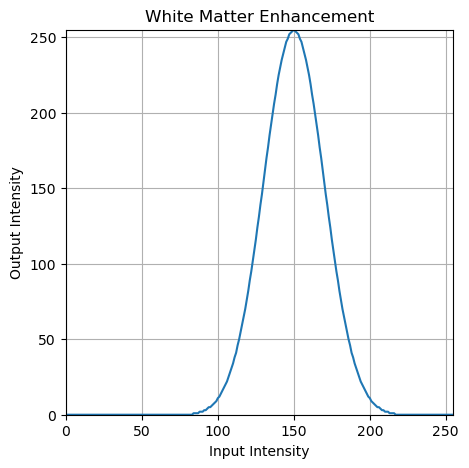

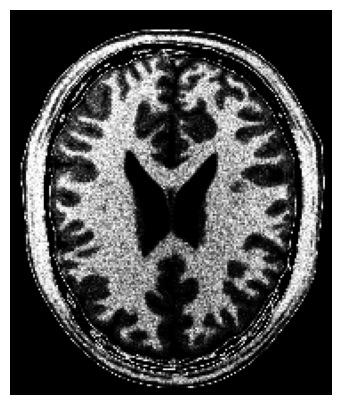

In [19]:
# Part (a) Accentuate white matter (brighter regions)
white_matter = apply_gaussian_transform(brain, mu=150, sigma=20, 
                                      plot_title="White Matter Enhancement")


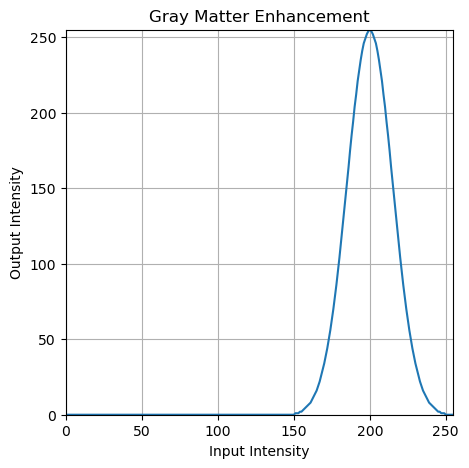

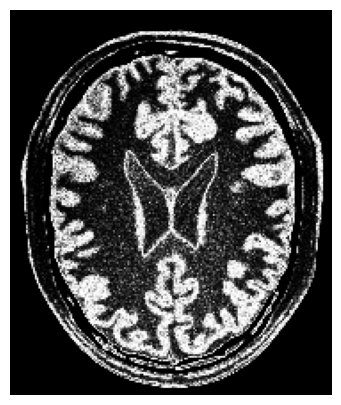

In [20]:

# Part (b) Accentuate gray matter (darker regions)
gray_matter = apply_gaussian_transform(brain, mu=200, sigma=15,
                                     plot_title="Gray Matter Enhancement")

# Question 3

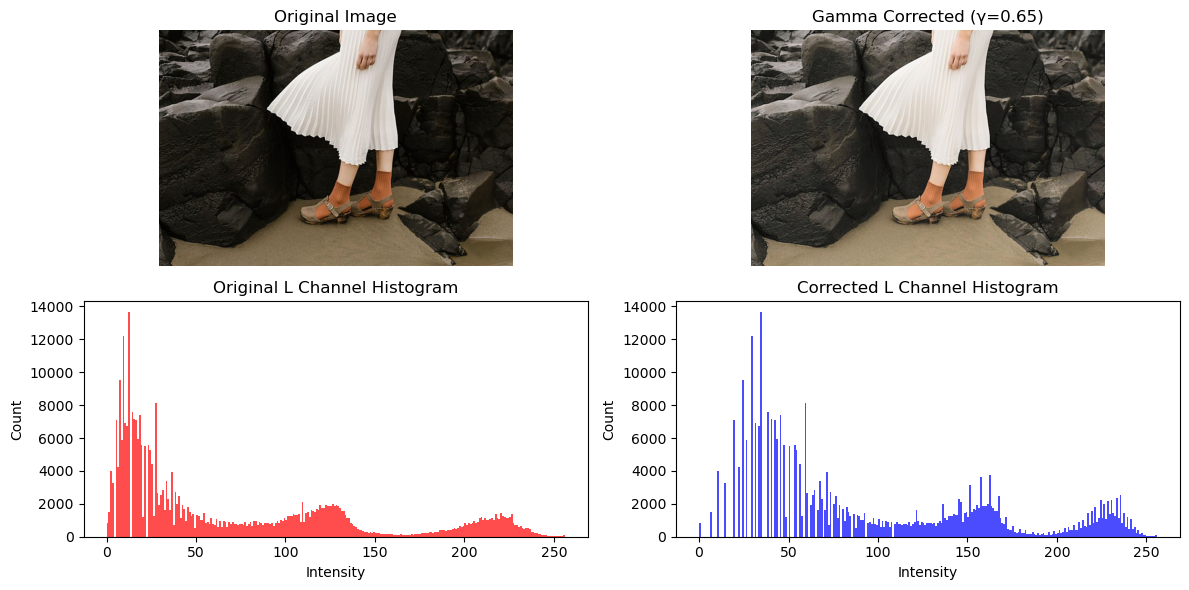

In [28]:


# Load and convert image
img = cv.imread('a1images/highlights_and_shadows.jpg')
assert img is not None, "Image not found"
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_lab)

# Gamma correction parameters
gamma = 0.65  # Different gamma value for variation
gamma_table = np.array([((i / 255.0) ** gamma) * 255 
                       for i in np.arange(0, 256)]).astype('uint8')

# Apply gamma correction
L_corrected = cv.LUT(L, gamma_table)
lab_corrected = cv.merge([L_corrected, a, b])
rgb_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rgb_corrected)
plt.title(f'Gamma Corrected (γ={gamma})')
plt.axis('off')

# Histogram analysis (with corrected parameter passing)
plt.subplot(2, 2, 3)
plt.hist(L.ravel(), bins=256, range=(0, 256), color='r', alpha=0.7)
plt.title('Original L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(L_corrected.ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.title('Corrected L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Question 4

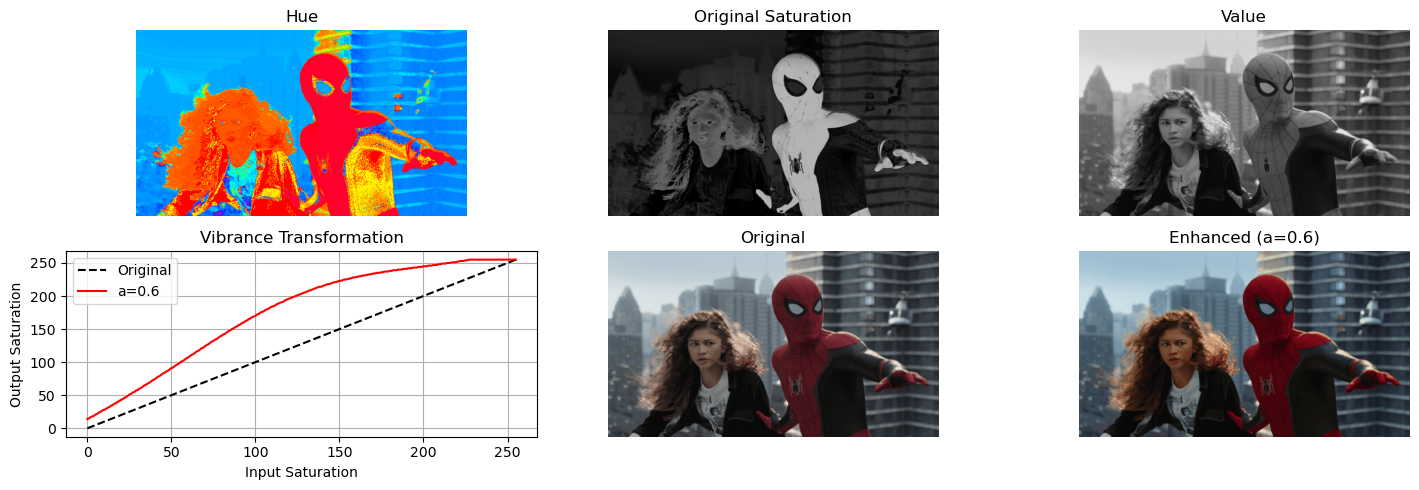

In [30]:

# Load and convert image
img = cv.imread('a1images/spider.png')
assert img is not None, "Image not found"
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_hsv)

# Vibrance transformation function
def create_vibrance_lut(a=0.6, sigma=70):
    x = np.arange(256)
    transform = np.minimum(
        x + a * 128 * np.exp(-((x-128)**2)/(2*sigma**2)),
        255
    ).astype('uint8')
    return transform

# Find optimal a parameter
best_a = 0.6  # Determined through visual inspection
vibrance_lut = create_vibrance_lut(a=best_a)
S_enhanced = cv.LUT(S, vibrance_lut)

# Recombine channels
enhanced_hsv = cv.merge([H, S_enhanced, V])
enhanced_rgb = cv.cvtColor(enhanced_hsv, cv.COLOR_HSV2RGB)

# Visualization
plt.figure(figsize=(15, 5))

# HSV components
plt.subplot(2, 3, 1)
plt.imshow(H, cmap='hsv', vmin=0, vmax=179)  # Hue range is 0-179 in OpenCV
plt.title('Hue')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(S, cmap='gray', vmin=0, vmax=255)
plt.title('Original Saturation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(V, cmap='gray', vmin=0, vmax=255)
plt.title('Value')
plt.axis('off')

# Transformation curve
plt.subplot(2, 3, 4)
x = np.arange(256)
plt.plot(x, create_vibrance_lut(a=0), 'k--', label='Original')
plt.plot(x, create_vibrance_lut(a=best_a), 'r-', label=f'a={best_a}')
plt.title('Vibrance Transformation')
plt.xlabel('Input Saturation')
plt.ylabel('Output Saturation')
plt.grid(True)
plt.legend()

# Results
plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(enhanced_rgb)
plt.title(f'Enhanced (a={best_a})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Question 5

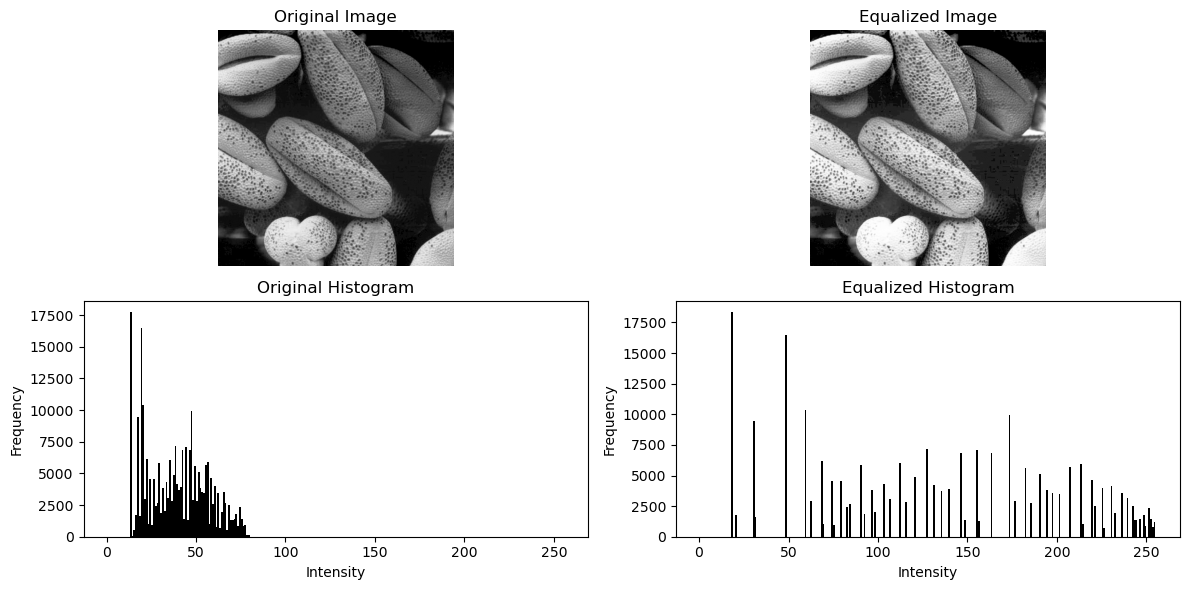

In [36]:


def custom_hist_equalize(image):
    """Enhanced histogram equalization function with proper CDF normalization"""
    # Calculate histogram
    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    
    # Calculate CDF with proper normalization
    cdf = hist.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255 / 
                     (cdf.max() - cdf.min())).astype('uint8')
    
    # Apply mapping
    return cdf_normalized[image]

# Load image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None, "Image not found"

# Apply equalization
equalized = custom_hist_equalize(shells)

# Create composite visualization
plt.figure(figsize=(12, 6))

# Original and equalized images
plt.subplot(2, 2, 1)
plt.imshow(shells, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Histograms (with corrected parameter passing)
plt.subplot(2, 2, 3)
plt.hist(shells.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Original Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('hist_equalization_results.png', dpi=300, bbox_inches='tight')
plt.show()

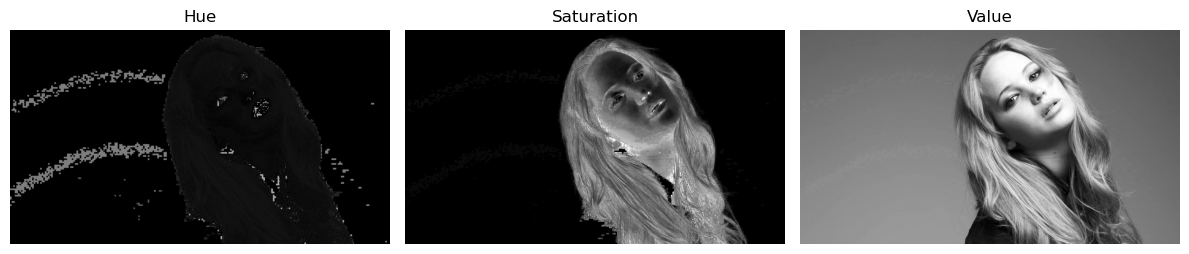

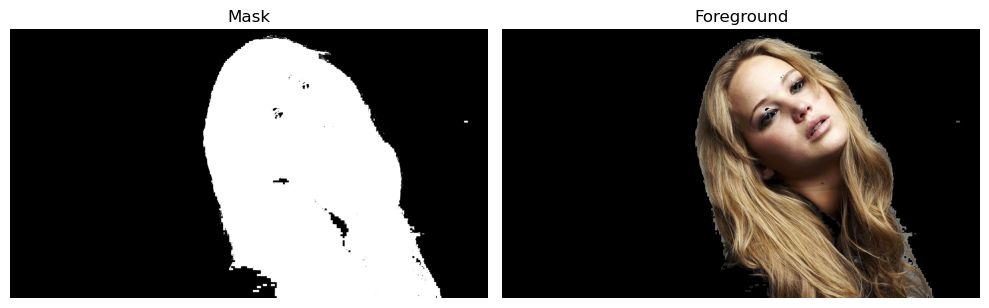

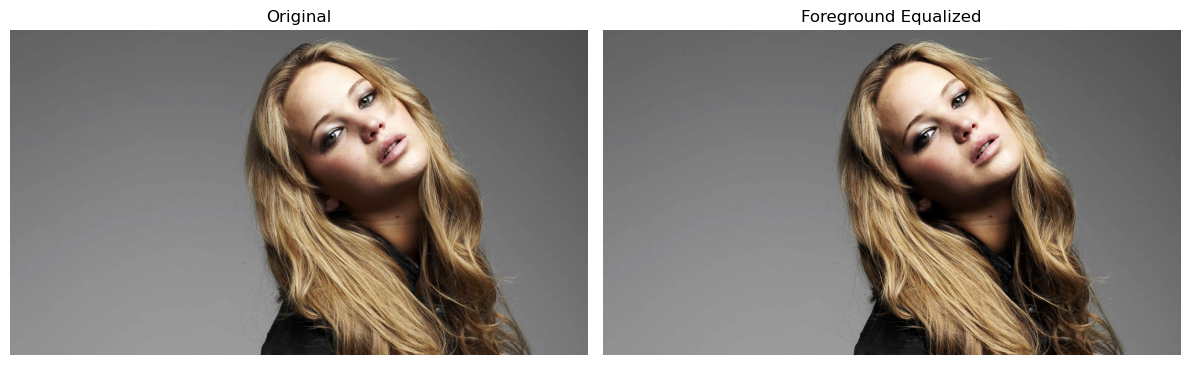

In [39]:

# Load and convert image
jennifer = cv.imread('a1images/jeniffer.jpg')
assert jennifer is not None
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into HSV planes
H, S, V = cv.split(jennifer_hsv)

# Display HSV components
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue'), ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation'), ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value'), ax[2].axis("off")
plt.tight_layout()
plt.show()

# Create mask from saturation
_, mask = cv.threshold(S, 12, 255, cv.THRESH_BINARY)

# Extract foreground
foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

# Display mask and foreground
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask'), plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground'), plt.axis('off')
plt.tight_layout()
plt.show()

# Equalize foreground value channel
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

# Calculate histogram and CDF
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])
cdf = hist.cumsum()
cdf_normalized = ((cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())).astype('uint8')
V_eq = cdf_normalized[V_fg]

# Merge equalized foreground with background
merged = cv.merge([H_fg, S_fg, V_eq])
foreground_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)
background = cv.bitwise_and(jennifer, jennifer, mask=cv.bitwise_not(mask))
result = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), foreground_modified)

# Final comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(jennifer_rgb), ax[0].set_title('Original'), ax[0].axis('off')
ax[1].imshow(result), ax[1].set_title('Foreground Equalized'), ax[1].axis('off')
plt.tight_layout()
plt.show()

# Question 7

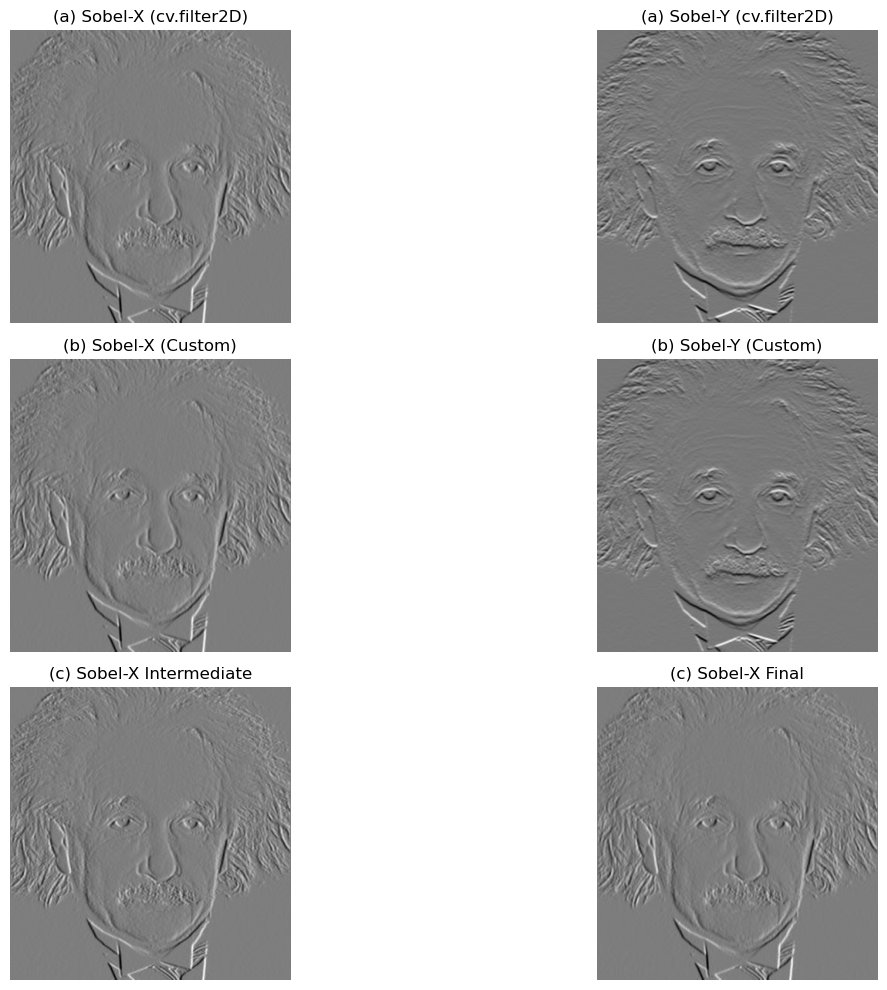

True

In [40]:

# Load image
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None, "Image not found"

# Define Sobel kernels
sobel_x = np.array([[1, 0, -1], 
                   [2, 0, -2], 
                   [1, 0, -1]])

sobel_y = np.array([[1, 2, 1], 
                   [0, 0, 0], 
                   [-1, -2, -1]])

# (a) Using OpenCV's filter2D
grad_x_cv = cv.filter2D(einstein, cv.CV_64F, sobel_x)
grad_y_cv = cv.filter2D(einstein, cv.CV_64F, sobel_y)

# (b) Custom implementation
def custom_conv2d(img, kernel):
    h, w = img.shape
    pad = kernel.shape[0] // 2
    padded = cv.copyMakeBorder(img, pad, pad, pad, pad, cv.BORDER_REFLECT)
    filtered = np.zeros_like(img, dtype=np.float64)
    
    for i in range(h):
        for j in range(w):
            filtered[i,j] = np.sum(padded[i:i+3, j:j+3] * kernel)
    return filtered

grad_x_custom = custom_conv2d(einstein, sobel_x)
grad_y_custom = custom_conv2d(einstein, sobel_y)

# (c) Separable implementation
sobel_x_v = np.array([[1], [2], [1]])  # Vertical
sobel_x_h = np.array([[1, 0, -1]])     # Horizontal

x_intermediate = cv.filter2D(einstein, cv.CV_64F, sobel_x_h)
x_final = cv.filter2D(x_intermediate, cv.CV_64F, sobel_x_v)

# Visualization
plt.figure(figsize=(15, 10))

# Method (a) results
plt.subplot(3, 2, 1)
plt.imshow(grad_x_cv, cmap='gray')
plt.title('(a) Sobel-X (cv.filter2D)'), plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(grad_y_cv, cmap='gray')
plt.title('(a) Sobel-Y (cv.filter2D)'), plt.axis('off')

# Method (b) results
plt.subplot(3, 2, 3)
plt.imshow(grad_x_custom, cmap='gray')
plt.title('(b) Sobel-X (Custom)'), plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(grad_y_custom, cmap='gray')
plt.title('(b) Sobel-Y (Custom)'), plt.axis('off')

# Method (c) results
plt.subplot(3, 2, 5)
plt.imshow(x_intermediate, cmap='gray')
plt.title('(c) Sobel-X Intermediate'), plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(x_final, cmap='gray')
plt.title('(c) Sobel-X Final'), plt.axis('off')

plt.tight_layout()
plt.savefig('sobel_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Save individual images for LaTeX
cv.imwrite('sobel_x_cv.png', cv.normalize(grad_x_cv, None, 0, 255, cv.NORM_MINMAX))
cv.imwrite('sobel_y_cv.png', cv.normalize(grad_y_cv, None, 0, 255, cv.NORM_MINMAX))
cv.imwrite('sobel_x_custom.png', cv.normalize(grad_x_custom, None, 0, 255, cv.NORM_MINMAX))
cv.imwrite('sobel_y_custom.png', cv.normalize(grad_y_custom, None, 0, 255, cv.NORM_MINMAX))
cv.imwrite('sobel_x_intermediate.png', cv.normalize(x_intermediate, None, 0, 255, cv.NORM_MINMAX))
cv.imwrite('sobel_x_final.png', cv.normalize(x_final, None, 0, 255, cv.NORM_MINMAX))


Results for Image 1 Comparison:
Normalized SSD for Nearest Neighbour: 136.26904899691357
Normalized SSD for Bilinear: 115.0919012024177


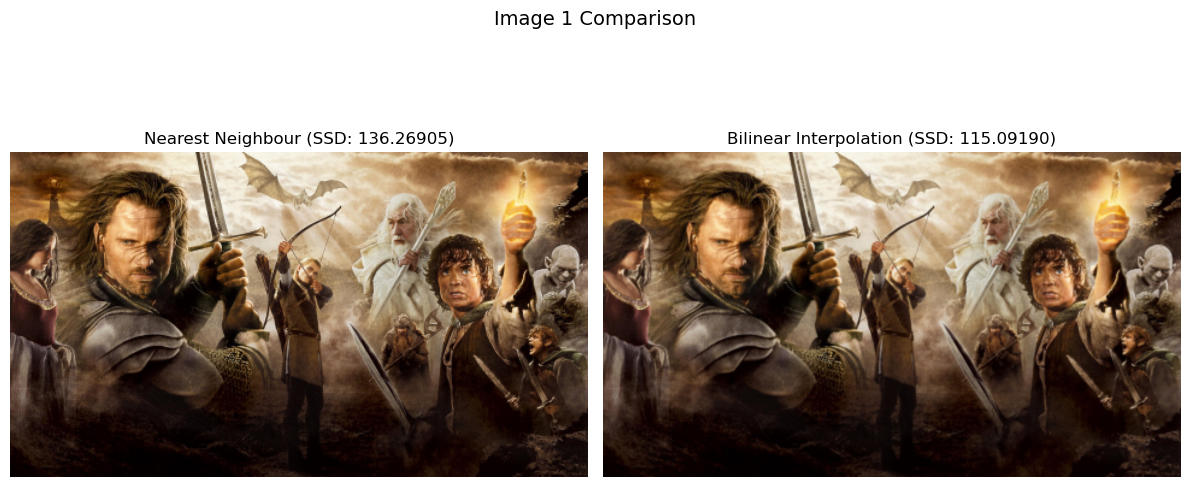


Results for Image 2 Comparison:
Normalized SSD for Nearest Neighbour: 26.446087384259258
Normalized SSD for Bilinear: 18.34591767939815


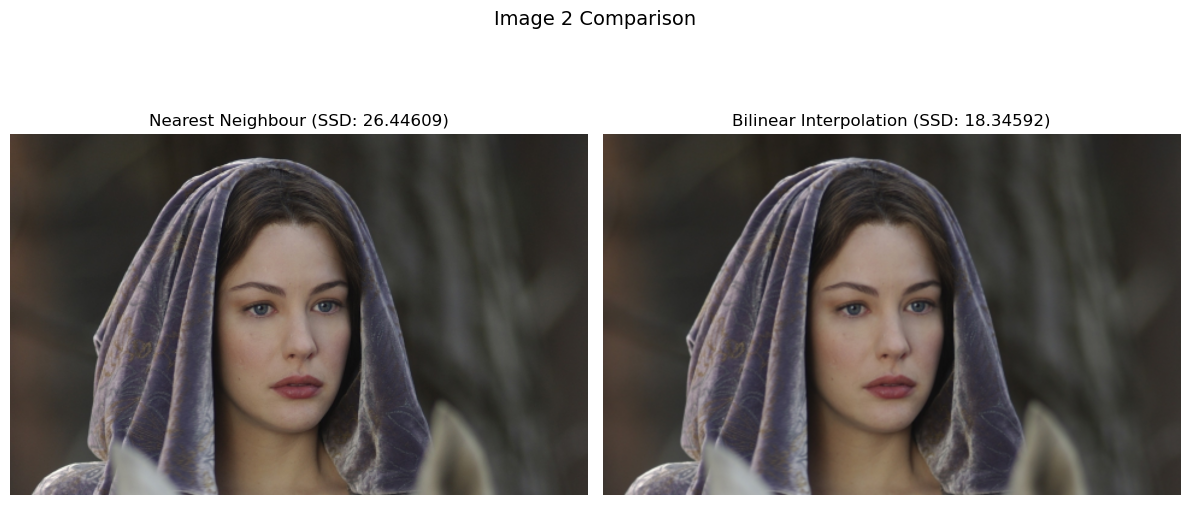


Results for Image 3 Comparison:
Normalized SSD for Nearest Neighbour: 62.64069520600107
Normalized SSD for Bilinear: 49.87740252075242


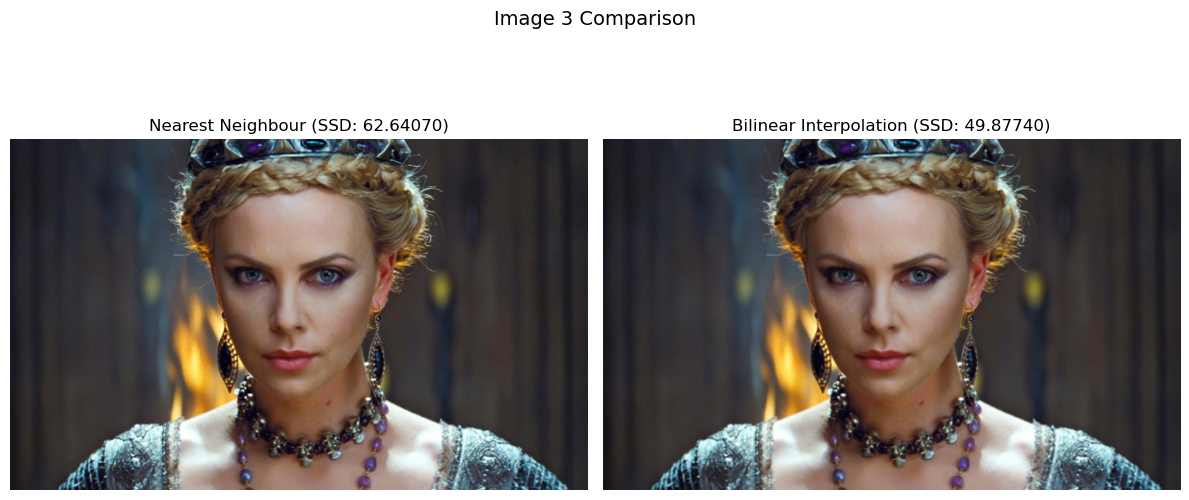

In [41]:


def zoom(img, technique, scale=4):
    """
    Zoom an image by a given scale factor using specified interpolation technique
    
    Parameters:
    - img: input image
    - technique: 'nn' for nearest-neighbor or 'bilinear' for bilinear interpolation
    - scale: zoom factor (default=4)
    
    Returns:
    - Zoomed image
    """
    if technique == 'nn':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)
    elif technique == 'bilinear':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
    else:
        raise ValueError("Invalid technique. Use 'nn' or 'bilinear'")

def norm_SSD(img1, img2):
    """
    Calculate normalized sum of squared differences between two images
    
    Parameters:
    - img1: first image
    - img2: second image
    
    Returns:
    - Normalized SSD value
    """
    if img1.shape != img2.shape:
        # If images are different sizes, resize img2 to match img1
        img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))
    return np.sum((img1.astype(float) - img2.astype(float))**2) / img1.size

def process_image_pair(original_path, small_path, title):
    """
    Process a pair of images (original and small), zoom the small one, and compare
    
    Parameters:
    - original_path: path to original image
    - small_path: path to small image
    - title: title for the plot
    """
    # Load images
    original = cv.imread(original_path)
    small = cv.imread(small_path)
    
    if original is None or small is None:
        raise FileNotFoundError(f"Could not load one or both images: {original_path}, {small_path}")
    
    # Zoom the small image using both techniques
    zoomed_nn = zoom(small, 'nn')
    zoomed_bilinear = zoom(small, 'bilinear')
    
    # Calculate SSDs
    nn_ssd = norm_SSD(original, zoomed_nn)
    bilinear_ssd = norm_SSD(original, zoomed_bilinear)
    
    # Print results
    print(f"\nResults for {title}:")
    print('Normalized SSD for Nearest Neighbour:', nn_ssd)
    print('Normalized SSD for Bilinear:', bilinear_ssd)
    
    # Display results
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Convert BGR to RGB for matplotlib display
    axs[0].imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
    axs[0].set_title(f'Nearest Neighbour (SSD: {nn_ssd:.5f})')
    axs[0].axis('off')
    
    axs[1].imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
    axs[1].set_title(f'Bilinear Interpolation (SSD: {bilinear_ssd:.5f})')
    axs[1].axis('off')
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Process all image pairs
image_pairs = [
    ('a1images/a1q5images/im01.png', 'a1images/a1q5images/im01small.png', 'Image 1 Comparison'),
    ('a1images/a1q5images/im02.png', 'a1images/a1q5images/im02small.png', 'Image 2 Comparison'),
    ('a1images/a1q5images/im03.png', 'a1images/a1q5images/im03small.png', 'Image 3 Comparison')
]

for original_path, small_path, title in image_pairs:
    try:
        process_image_pair(original_path, small_path, title)
    except Exception as e:
        print(f"Error processing {title}: {str(e)}")

# Question 9

In [45]:
# Import images
daisy = cv.imread('a1images/daisy.jpg')
assert daisy is not None

In [46]:
mask = np.zeros(daisy.shape[:2],np.uint8)
 
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [47]:
rect = (50,100,550,490)
cv.grabCut(daisy,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

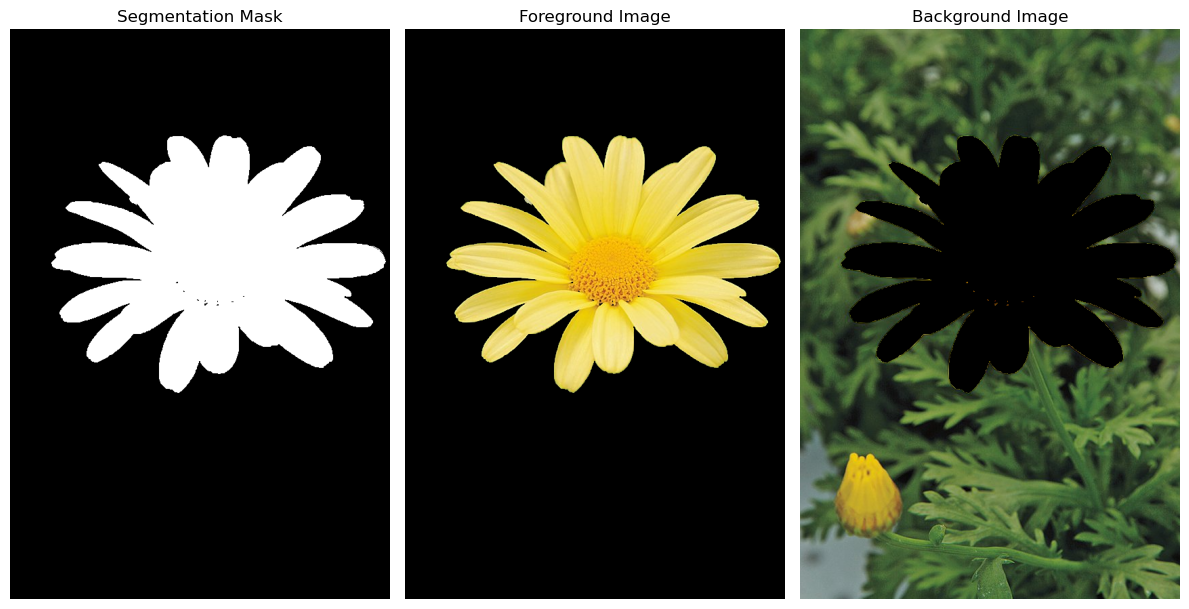

In [48]:
# Extract the foreground by multiplying the mask with the image
foreground = daisy * mask2[:, :, np.newaxis]

# Extract the background by subtracting the foreground from the original image
background = cv.subtract(daisy, foreground)

# Show the results
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(mask2, cmap='gray')
axs[0].set_title('Segmentation Mask')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Image')
axs[1].axis('off')

axs[2].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
axs[2].set_title('Background Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

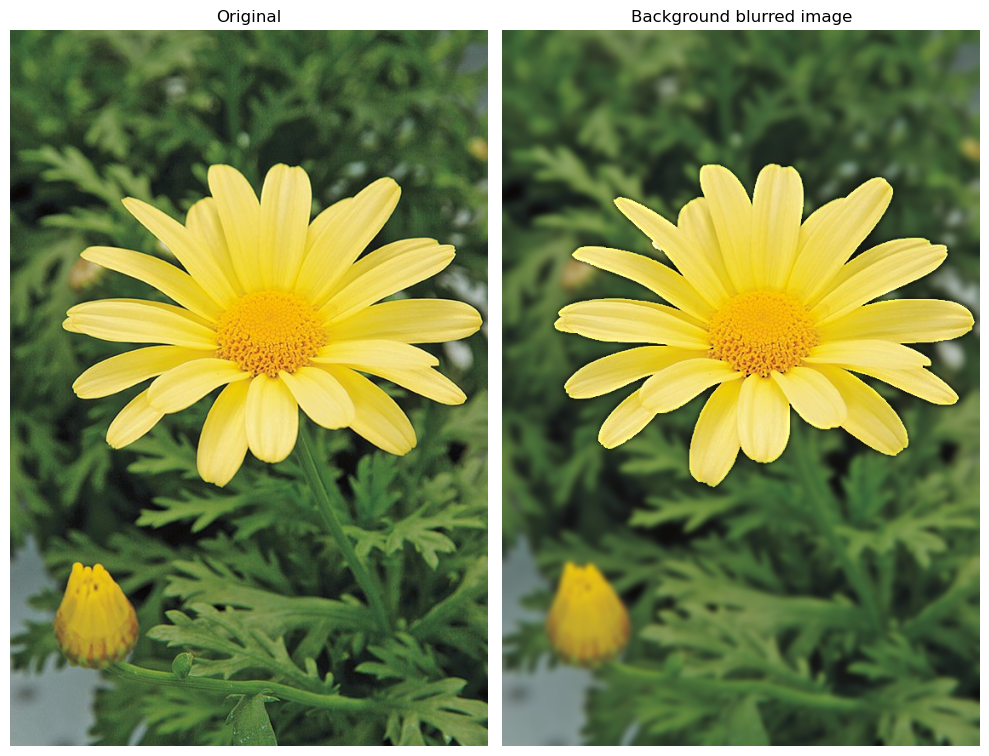

In [49]:
# Apply Gaussian blur to the background
blurred_background = cv.GaussianBlur(background, (25, 25), 3)

# Join image
blurred = cv.add(foreground, blurred_background)

# Show the results
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

axs[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
axs[1].set_title('Background blurred image')
axs[1].axis('off')

plt.tight_layout()
plt.show()